<a href="https://colab.research.google.com/github/HansHenseler/masdav2024/blob/main/Part_3_Plaso_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plaso super timeline exercises and explanations

Part 3

Master of Advanced Studies in Digital Forensics & Cyber Investigation

Data Analytics and Visualization for Digital Forensics

(c) Hans Henseler, 2024


# Part 3


## 1 Installing plaso tools in the colab notebook

In [1]:
# various install steps to install plaso tools and dependencies to get plaso working in colab
# -y option is to skip user interaction
# some packages need to be deinstalled and reinstalled to resolve dependencies
# these steps take 3-5 minutes to complete on a fresh colab instance
!add-apt-repository -y ppa:gift/stable
!apt update
!apt-get update
!apt install plaso-tools
# !pip uninstall -y pytsk3
# !pip install pytsk3
# !pip uninstall -y yara-python
# !pip install yara-python
# !pip uninstall -y lz4
# !pip install lz4
# !pip install pyparsing==3.1.0

Repository: 'deb https://ppa.launchpadcontent.net/gift/stable/ubuntu/ jammy main'
Description:
Periodic releases, contains periodic releases intended for non-development use
More info: https://launchpad.net/~gift/+archive/ubuntu/stable
Adding repository.
Adding deb entry to /etc/apt/sources.list.d/gift-ubuntu-stable-jammy.list
Adding disabled deb-src entry to /etc/apt/sources.list.d/gift-ubuntu-stable-jammy.list
Adding key to /etc/apt/trusted.gpg.d/gift-ubuntu-stable.gpg with fingerprint 3ED1EAECE81894B171D7DA5B5E80511B10C598B8
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 https://developer.do

In [ ]:
!pip install plaso

In [2]:
!log2timeline.py --version
!psort.py --version
!pinfo.py --version


plaso - log2timeline version 20240308
plaso - psort version 20240308
plaso - pinfo version 20240308


In [4]:
!python --version

Python 3.10.12


In [3]:
# check if plasoo tools were installed by running psort.py. Use -h to get help
!psort.py -h

usage: psort.py [-h] [--troubles] [-V] [--analysis PLUGIN_LIST] [--process_memory_limit SIZE]
                [--temporary_directory DIRECTORY] [--worker_memory_limit SIZE]
                [--worker_timeout MINUTES] [--logfile FILENAME] [-d] [-q] [-u]
                [--status_view TYPE] [--status_view_file PATH] [--status_view_interval SECONDS]
                [--slice DATE_TIME] [--slice_size SLICE_SIZE] [--slicer] [--data PATH] [-a]
                [--language LANGUAGE_TAG] [--additional_fields ADDITIONAL_FIELDS]
                [--custom_fields CUSTOM_FIELDS] [--custom_formatter_definitions PATH]
                [--dynamic_time] [--output_time_zone TIME_ZONE] [-o FORMAT] [-w OUTPUT_FILE]
                [--fields FIELDS] [--profilers PROFILERS_LIST] [--profiling_directory DIRECTORY]
                [--profiling_sample_rate SAMPLE_RATE]
                [PATH] [FILTER]

Application to read, filter and process output from a Plaso storage file.

positional arguments:
  PATH            

In [5]:
# try log2timeline.py -h to get an overview. Look at the --parsers section
!log2timeline.py --parsers list


*********************************** Parsers ************************************
                 Name : Description
--------------------------------------------------------------------------------
    android_app_usage : Parser for Android usage history (usage-history.xml)
                        files.
              asl_log : Parser for Apple System Log (ASL) files.
              bencode : Parser for Bencoded files.
       binary_cookies : Parser for Safari Binary Cookie files.
             bodyfile : Parser for SleuthKit version 3 bodyfile.
              bsm_log : Parser for Basic Security Module (BSM) event auditing
                        files.
         chrome_cache : Parser for Google Chrome or Chromium Cache files.
   chrome_preferences : Parser for Google Chrome Preferences files.
             cups_ipp : Parser for CUPS IPP files.
  custom_destinations : Parser for Custom destinations jump list
                        (.customDestinations-ms) files.
                 czip : Pa

## 2 Log2timeline.py and Pinfo.py

In [6]:
# Add a shortcut in your Google drive to this shared drive https://drive.google.com/drive/folders/1KUlZUl4Sy2JzgbuRW-oHjIGFClY2bl75?usp=sharing
# The files in this folder are part of the MUS2019 CTF (Capture the Flag) challenge.  By attaching this folder
# to our google drive we don't need to download the 10GB E01 file that we are going to use.
#
# After you have added the folder as a shortcut, mount your google drive in this colab (you need to authorize this colab to access your google drive)
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
# check what's in the images folder. The output of the ls -l command should look like this:
#
#
# !ls -l /content/gdrive/MyDrive/Images/Windows
# total 10367329
# -r-------- 1 root root 10616142693 Mar 21  2019 MUS-CTF-19-DESKTOP-001.E01
#
# as you can see the size of E01 file is 10.616.142.693 bytes, which equals to 10GB
#
disk_image = "/content/gdrive/MyDrive/Images/Windows/MUS-CTF-19-DESKTOP-001.E01"
!ls -l $disk_image

-r-------- 1 root root 10616142693 Mar 21  2019 /content/gdrive/MyDrive/Images/Windows/MUS-CTF-19-DESKTOP-001.E01


In [9]:
# demo of image_export.

# Get the Security event log from this windows system (remove # at the beginning of the line to try, takes 5-7 minutes):
#
#!image_export.py --names Security.evtx --data \Windows\System32\winevt\Logs $disk_image
#
# Export office documents (this takes about 4-6 minutes for the MUS2019 CTF image):
#
# !image_export.py --artifact_definitions /usr/local/lib/python3.10/dist-packages/artifacts/data -x "doc,docx,xls,xlsx,ppt,pptx"  $disk_image
!image_export.py -x "doc,docx,xls,xlsx,ppt,pptx"  $disk_image

2024-08-05 09:05:04,630 [INFO] (MainProcess) PID:5462 <artifact_definitions> Determined artifact definitions path: /usr/share/artifacts
Filters:
	extensions: doc, docx, xls, xlsx, ppt, pptx
Export started.
Extracting file entries.
Export completed.



In [10]:
# check in the folder/files tab of this Colab and you should see an export folder. Image_export
# exports the result to this folder, replicating the folder structure in the E01 image
# It should show:
# ./export/Windows/System32/MSDRM/MsoIrmProtector.xls
# ./export/Windows/System32/MSDRM/MsoIrmProtector.ppt
# ./export/Windows/System32/MSDRM/MsoIrmProtector.doc
# ./export/hashes.json

!find ./export -name "*" -type f

./export/Windows/System32/MSDRM/MsoIrmProtector.xls
./export/Windows/System32/MSDRM/MsoIrmProtector.ppt
./export/Windows/System32/MSDRM/MsoIrmProtector.doc
./export/hashes.json


In [11]:
# To get help on image_export.py use:
#
!image_export.py -h

usage: image_export.py [-h] [--troubles] [-V] [-d] [-q] [-u] [--artifact_definitions PATH]
                       [--custom_artifact_definitions PATH] [--data PATH]
                       [--process_memory_limit SIZE] [--vfs_back_end TYPE] [--logfile FILENAME]
                       [--partitions PARTITIONS] [--volumes VOLUMES] [--no_vss] [--vss_only]
                       [--vss_stores VSS_STORES] [--credential TYPE:DATA]
                       [--artifact_filters ARTIFACT_FILTERS] [--artifact_filters_file PATH]
                       [--date-filter TYPE_START_END] [-f FILE_FILTER] [-x EXTENSIONS]
                       [--names NAMES] [--signatures IDENTIFIERS] [-w PATH] [--include_duplicates]
                       [--no_hashes]
                       [IMAGE]

This is a simple collector designed to export files inside an image, both within a regular RAW image as well as inside a VSS. The tool uses a collection filter that uses the same syntax as a targeted plaso filter.

positional

In [12]:
# Same for log2timeline.py
!log2timeline.py -h

usage: log2timeline.py [-h] [--troubles] [-V] [--artifact_definitions PATH]
                       [--custom_artifact_definitions PATH] [--data PATH] [--archives TYPES]
                       [--artifact_filters ARTIFACT_FILTERS] [--artifact_filters_file PATH]
                       [--extract_winreg_binary] [--preferred_year YEAR]
                       [--skip_compressed_streams] [-f FILE_FILTER]
                       [--hasher_file_size_limit SIZE] [--hashers HASHER_LIST]
                       [--parsers PARSER_FILTER_EXPRESSION] [--yara_rules PATH]
                       [--partitions PARTITIONS] [--volumes VOLUMES] [--codepage CODEPAGE]
                       [--language LANGUAGE_TAG] [--no_extract_winevt_resources] [-z TIME_ZONE]
                       [--no_vss] [--vss_only] [--vss_stores VSS_STORES] [--credential TYPE:DATA]
                       [-d] [-q] [-u] [--info] [--use_markdown] [--no_dependencies_check]
                       [--logfile FILENAME] [--status_view TYPE]

In [13]:
# use log2timeline to proces the security.evtx file directly by using a filter definition
# which is stored in the testdata folder

filter_windows_evtx = "/content/gdrive/MyDrive/Testdata/filter_windows_evtx.yml"
!cat  $filter_windows_evtx


description: Windows Event Log files.
type: include
path_separator: '/'
paths:
- '/Windows/System32/winevt/Logs/Security.evtx'


In [14]:
# We use the filter_windows_security_evtx.txt file select the parser evtx
# this operations takes about 50 seconds to complete
#

!log2timeline.py -f $filter_windows_evtx --storage_file winsecurity.plaso $disk_image --status_view none --parsers "winevtx"


2024-08-05 09:22:15,771 [INFO] (MainProcess) PID:9606 <artifact_definitions> Determined artifact definitions path: /usr/share/artifacts
Checking availability and versions of dependencies.
[OPTIONAL]	unable to determine version information for: flor
[OK]


Source path		: /content/gdrive/MyDrive/Images/Windows/MUS-CTF-19-DESKTOP-001.E01
Source type		: storage media image
Filter file		: /content/gdrive/MyDrive/Testdata/filter_windows_evtx.yml
Processing time		: 00:00:00

Processing started.
Processing completed.

Number of warnings generated while extracting events: 2.

Use pinfo to inspect warnings in more detail.



In [15]:
# if you refresh the files tab in your Colab you will see that a file winsecurity.plaso was created.
# we can use pinfo.py to see what it contains
#
!pinfo.py --sections "events,reports,sessions" winsecurity.plaso


************************** Plaso Storage Information ***************************
            Filename : winsecurity.plaso
      Format version : 20230327
Serialization format : json
--------------------------------------------------------------------------------

*********************************** Sessions ***********************************
a65db0f7-953e-429a-a7ad-f9b3d96813ed : 2024-08-05T09:22:17.987764+00:00
--------------------------------------------------------------------------------

**************** Session: a65db0f7-953e-429a-a7ad-f9b3d96813ed *****************
                Start time : 2024-08-05T09:22:17.987764+00:00
           Completion time : 2024-08-05T09:23:23.993543+00:00
              Product name : plaso
           Product version : 20240308
    Command line arguments : /usr/bin/log2timeline.py -f
                             /content/gdrive/MyDrive/Testdata/filter_windows_evtx.yml
                             --storage_file winsecurity.plaso
                 

## 3 Psort.py output formats and (additional) fields

In [16]:
!psort.py -o list


******************************** Output Modules ********************************
         Name : Description
--------------------------------------------------------------------------------
      dynamic : Dynamic selection of fields for a separated value output
                format.
         json : Saves the events into a JSON format.
    json_line : Saves the events into a JSON line format.
          kml : Saves events with geography data into a KML format.
       l2tcsv : CSV format used by legacy log2timeline, with 17 fixed fields.
       l2ttln : Extended TLN 7 field | delimited output.
         null : Output module that does not output anything.
   opensearch : Saves the events into an OpenSearch database.
opensearch_ts : Saves the events into an OpenSearch database for use with
                Timesketch.
        rawpy : native (or "raw") Python output.
          tln : TLN 5 field | delimited output.
         xlsx : Excel Spreadsheet (XLSX) output
----------------------------

In [17]:
# create a csv file from the winsecurity.plaso file using the legacy l2tcsv output format
# the --status_view none prevents dynamic updates that works nice on a terminal but not in Colab
# try if you like by leaving it out
#
!psort.py  -o l2tcsv -w winsecurityevtx_l2tcsv.csv winsecurity.plaso --status_view none

only date and time values and/or a limited predefined set of output fields. It
is strongly recommend to use an alternative output format like: dynamic.

Waiting for 15 second to give you time to cancel.

Processing completed.


In [18]:
# take a look at the column header and the first data row
!cat winsecurityevtx_l2tcsv.csv | head -n 2

date,time,timezone,MACB,source,sourcetype,type,user,host,short,desc,version,filename,inode,notes,format,extra
07/28/2018,00:36:44,UTC,M..B,EVT,WinEVTX,Content Modification Time; Creation Time,-,DESKTOP-0QT8017,[4616 / 0x1208] Provider identifier: {54849625-5478-4994-a5ba-3e3b0328c30d} S...,[4616 / 0x1208] Provider identifier: {54849625-5478-4994-a5ba-3e3b0328c30d} Source Name: Microsoft-Windows-Security-Auditing Strings: ['S-1-5-19'  'LOCAL SERVICE'  'NT AUTHORITY'  '0x00000000000003e5'  '2018-07-28T07:36:44.736894900Z'  '2018-07-28T00:36:44.670939600Z'  '0x0000000000000530'  'C:\\Windows\\System32\\svchost.exe'] Computer Name: DESKTOP-0QT8017 Record Number: 429 Event Level: 0,2,NTFS:\Windows\System32\winevt\Logs\Security.evtx,83669,-,winevtx,event_version: 1; message_identifier: 4616; recovered: False; sha256_hash: 0d4b19d89a5cba2766d6ac7e008c0673087a8e2dc731f7969345cc4d45277c76; xml_string: <Event xmlns="http://schemas.microsoft.com/win/2004/08/events/event">-  <System>-    <Provider

In [19]:
# try this with some other output format options. With the l2tcsv output format we received a warning:
#
# WARNING: the output format: l2tcsv has significant limitations such as second-
# only date and time values and/or a limited predefined set of output fields. It
# is strongly recommend to use an alternative output format like: dynamic.
#
# so let's try the dynamic output format
#
!psort.py -o dynamic -w winsecurityevtx_dynamic.csv winsecurity.plaso --status_view none
!cat winsecurityevtx_dynamic.csv | head -n 2

Processing completed.
datetime,timestamp_desc,source,source_long,message,parser,display_name,tag
2018-07-28T00:36:44.663495+00:00,Content Modification Time,EVT,WinEVTX,[4616 / 0x1208] Provider identifier: {54849625-5478-4994-a5ba-3e3b0328c30d} Source Name: Microsoft-Windows-Security-Auditing Strings: ['S-1-5-19'  'LOCAL SERVICE'  'NT AUTHORITY'  '0x00000000000003e5'  '2018-07-28T07:36:44.736894900Z'  '2018-07-28T00:36:44.670939600Z'  '0x0000000000000530'  'C:\\Windows\\System32\\svchost.exe'] Computer Name: DESKTOP-0QT8017 Record Number: 429 Event Level: 0,winevtx,NTFS:\Windows\System32\winevt\Logs\Security.evtx,-


In [20]:
# the default dynamic output format has not that many columns. We can specify additional fields
# unfortunately there is no complete overview of all possible fields because they are parsed dynamically
# from the input. Additional fields for which no value is available are filled with a - sign
#
!rm winsecurityevtx_dynamic.csv
!psort.py --status_view none -o dynamic --additional_fields "data_type, drive_type, drive_serial_number,droid_file_identifier"  -w winsecurityevtx_dynamic.csv winsecurity.plaso
!cat winsecurityevtx_dynamic.csv | head -n 2

Processing completed.
datetime,timestamp_desc,source,source_long,message,parser,display_name,tag,data_type, drive_type, drive_serial_number,droid_file_identifier
2018-07-28T00:36:44.663495+00:00,Content Modification Time,EVT,WinEVTX,[4616 / 0x1208] Provider identifier: {54849625-5478-4994-a5ba-3e3b0328c30d} Source Name: Microsoft-Windows-Security-Auditing Strings: ['S-1-5-19'  'LOCAL SERVICE'  'NT AUTHORITY'  '0x00000000000003e5'  '2018-07-28T07:36:44.736894900Z'  '2018-07-28T00:36:44.670939600Z'  '0x0000000000000530'  'C:\\Windows\\System32\\svchost.exe'] Computer Name: DESKTOP-0QT8017 Record Number: 429 Event Level: 0,winevtx,NTFS:\Windows\System32\winevt\Logs\Security.evtx,-,windows:evtx:record,-,-,-


In [29]:
!log2timeline.py --info --artifact_filters list

======================== log2timeline/plaso information ========================

*********************************** Versions ***********************************
        Name : Description
--------------------------------------------------------------------------------
plaso engine : 20240308
      python : 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
--------------------------------------------------------------------------------

*********************************** Hashers ************************************
   Name : Description
--------------------------------------------------------------------------------
entropy : Calculates the byte entropy of input data.
    md5 : Calculates an MD5 digest hash over input data.
   sha1 : Calculates a SHA-1 digest hash over input data.
 sha256 : Calculates a SHA-256 digest hash over input data.
--------------------------------------------------------------------------------

*********************************** Parsers *******************

We use the complete plaso file of the mus2019ctf e01 image.

In [ ]:
# If we don't use a filter file the following command will parse the E01 using the win7 parser preset. We'll skip this for now.

# !log2timeline.py --storage_file mus2019ctf_no_filter.plaso $disk_image --parsers win7


In [36]:
# This takes 1hr 25min to complete and results in a 1GB plaso file containing the following output:
# --------------------------------------------------------------------------------
#                              amcache : 758
#                       appcompatcache : 742
#                               bagmru : 40
#                                  bam : 45
#                    chrome_27_history : 606
#                    chrome_66_cookies : 351
#                         chrome_cache : 7351
#                explorer_mountpoints2 : 10
#               explorer_programscache : 2
#                             filestat : 777476
#                                  lnk : 603
#                       mrulist_string : 2
#            mrulistex_shell_item_list : 4
#                     mrulistex_string : 6
#      mrulistex_string_and_shell_item : 11
# mrulistex_string_and_shell_item_list : 1
#                        msie_webcache : 1282
#                            msie_zone : 48
#                             networks : 4
#         olecf_automatic_destinations : 66
#                        olecf_default : 97
#               olecf_document_summary : 12
#                        olecf_summary : 46
#                                   pe : 56082
#                             prefetch : 1051
#                             setupapi : 224
#                          shell_items : 399
#                           userassist : 36
#                              usnjrnl : 292405
#                 windows_boot_execute : 2
#                          windows_run : 11
#                    windows_sam_users : 7
#                     windows_services : 588
#                     windows_shutdown : 2
#                   windows_task_cache : 537
#                     windows_timezone : 1
#                   windows_typed_urls : 5
#                  windows_usb_devices : 2
#                      windows_version : 3
#                              winevtx : 222262
#                             winlogon : 4
#                       winreg_default : 489404
#                                Total : 1852588


-r-------- 1 root root 10450 Aug  5 10:52 /content/gdrive/MyDrive/Testdata/filter_windows.yml


In [ ]:
# if you haven't skipped this, you can use pinfo.py to get the stats

# !pinfo.py --sections "events,reports,sessions" mus2019ctf_no_filter.plaso

In [39]:
# We can speed up the proces by specifying a file filter. Here is a filter file for Windows:
#
# !wget "https://raw.githubusercontent.com/mark-hallman/plaso_filters/master/filter_windows.txt"
#
# Unfortunately, this text based filter file is no longer supported. We must provide it in yaml format.
# There is a yml version of the filter in the testdata folder:

filter_windows = "/content/gdrive/MyDrive/Testdata/filter_windows.yml"
!ls -l  $filter_windows


-r-------- 1 root root 10450 Aug  5 10:52 /content/gdrive/MyDrive/Testdata/filter_windows.yml


In [51]:
!log2timeline.py -f $filter_windows --storage_file mus2019ctf.plaso $disk_image --parsers win7 --status_view none

2024-08-05 12:11:12,948 [INFO] (MainProcess) PID:50388 <artifact_definitions> Determined artifact definitions path: /usr/share/artifacts
Checking availability and versions of dependencies.
[OPTIONAL]	unable to determine version information for: flor
[OK]


Source path		: /content/gdrive/MyDrive/Images/Windows/MUS-CTF-19-DESKTOP-001.E01
Source type		: storage media image
Filter file		: /content/gdrive/MyDrive/Testdata/filter_windows.yml
Processing time		: 00:00:00

Processing started.
Processing completed.

Number of warnings generated while extracting events: 26.

Use pinfo to inspect warnings in more detail.



In [52]:
# This took only 11 minutes to complete and the plaso file is 470MB. This is the output of pinfo.py:

#                      amcache : 758
#               appcompatcache : 742
#                          bam : 45
#                     filestat : 6772
#                          lnk : 162
#                msie_webcache : 2564
#                    msie_zone : 24
#                     networks : 4
# olecf_automatic_destinations : 66
#                olecf_default : 11
#                           pe : 86
#                     prefetch : 1051
#                     setupapi : 202
#                  shell_items : 75
#                      usnjrnl : 292405
#         windows_boot_execute : 2
#                  windows_run : 6
#            windows_sam_users : 7
#             windows_services : 588
#             windows_shutdown : 2
#           windows_task_cache : 537
#             windows_timezone : 1
#           windows_typed_urls : 2
#          windows_usb_devices : 2
#              windows_version : 3
#                      winevtx : 222262
#                     winlogon : 4
#               winreg_default : 282403
#                        Total : 810786

# What is missing?
# Try it yourself

!pinfo.py --sections "events,reports,sessions" mus2019ctf.plaso


************************** Plaso Storage Information ***************************
            Filename : mus2019ctf.plaso
      Format version : 20230327
Serialization format : json
--------------------------------------------------------------------------------

*********************************** Sessions ***********************************
4fe039c0-2fc8-43bb-97d8-8c424eb9ebbc : 2024-08-05T12:11:16.198675+00:00
--------------------------------------------------------------------------------

**************** Session: 4fe039c0-2fc8-43bb-97d8-8c424eb9ebbc *****************
                Start time : 2024-08-05T12:11:16.198675+00:00
           Completion time : 2024-08-05T12:22:56.014129+00:00
              Product name : plaso
           Product version : 20240308
    Command line arguments : /usr/bin/log2timeline.py -f
                             /content/gdrive/MyDrive/Testdata/filter_windows.yml
                             --storage_file mus2019ctf.plaso
                        

### Detailed Breakdown

Here's a detailed breakdown of changes in the number of events for each artifact between the two versions:

| **Artifact**                      | **Without Filter** | **With Filter** | **Difference**         |
|-----------------------------------|--------------------|-----------------|------------------------|
| `amcache`                         | 758                | 758             | No change              |
| `appcompatcache`                  | 742                | 742             | No change              |
| `bagmru`                          | 40                 | -               | Removed in filtered    |
| `bam`                             | 45                 | 45              | No change              |
| `chrome_27_history`              | 606                | -               | Removed in filtered    |
| `chrome_66_cookies`              | 351                | -               | Removed in filtered    |
| `chrome_cache`                   | 7,351              | -               | Removed in filtered    |
| `explorer_mountpoints2`          | 10                 | -               | Removed in filtered    |
| `explorer_programscache`         | 2                  | -               | Removed in filtered    |
| `filestat`                        | 777,476            | 6,772           | -770,704               |
| `lnk`                             | 603                | 162             | -441                   |
| `mrulist_string`                 | 2                  | -               | Removed in filtered    |
| `mrulistex_shell_item_list`      | 4                  | -               | Removed in filtered    |
| `mrulistex_string`               | 6                  | -               | Removed in filtered    |
| `mrulistex_string_and_shell_item`| 11                 | -               | Removed in filtered    |
| `mrulistex_string_and_shell_item_list`| 1             | -               | Removed in filtered    |
| `msie_webcache`                   | 1,282              | 2,564           | +1,282                 |
| `msie_zone`                      | 48                 | 24              | -24                    |
| `networks`                        | 4                  | 4               | No change              |
| `olecf_automatic_destinations`    | 66                 | 66              | No change              |
| `olecf_default`                  | 97                 | 11              | -86                    |
| `olecf_document_summary`         | 12                 | -               | Removed in filtered    |
| `olecf_summary`                  | 46                 | -               | Removed in filtered    |
| `pe`                             | 56,082             | 86              | -55,996                |
| `prefetch`                        | 1,051              | 1,051           | No change              |
| `setupapi`                        | 224                | 202             | -22                    |
| `shell_items`                     | 399                | 75              | -324                   |
| `userassist`                     | 36                 | -               | Removed in filtered    |
| `usnjrnl`                         | 292,405            | 292,405         | No change              |
| `windows_boot_execute`           | 2                  | 2               | No change              |
| `windows_run`                    | 11                 | 6               | -5                     |
| `windows_sam_users`              | 7                  | 7               | No change              |
| `windows_services`               | 588                | 588             | No change              |
| `windows_shutdown`               | 2                  | 2               | No change              |
| `windows_task_cache`             | 537                | 537             | No change              |
| `windows_timezone`               | 1                  | 1               | No change              |
| `windows_typed_urls`             | 5                  | 2               | -3                     |
| `windows_usb_devices`            | 2                  | 2               | No change              |
| `windows_version`                | 3                  | 3               | No change              |
| `winevtx`                         | 222,262            | 222,262         | No change              |
| `winlogon`                       | 4                  | 4               | No change              |
| `winreg_default`                 | 489,404            | 282,403         | -207,001               |

### Analysis

- **Artifacts Removed with Filter**:
  - The filter significantly reduces the number of artifacts for several types, such as `filestat`, `lnk`, and `pe`. This indicates that the filter was designed to narrow down the analysis to specific areas, likely focusing on more relevant data or areas of interest.
  - Artifacts related to specific browser caches (e.g., `chrome_cache`) and other lists (`mrulist`) are removed, which might not be deemed as critical for the analysis intended with the filter.

- **Artifacts Increased with Filter**:
  - The increase in `msie_webcache` entries suggests that the filter explicitly targets this artifact more aggressively, perhaps due to its relevance in the investigation context.

- **No Change**:
  - Some artifacts like `usnjrnl`, `winevtx`, and others remain unchanged, indicating these are either not affected by the filter or they are always considered important regardless of filtering.

In [58]:
# Let's save the file in our gdrive because we want to use it again in part 4 this afternoon
#
!cp mus2019ctf.plaso gdrive/MyDrive
#
# set a variable
#
plaso_file = '/content/gdrive/MyDrive/mus2019ctf.plaso'
#
# and check if it's there
#
!ls -l $plaso_file


-rw------- 1 root root 493842432 Aug  5 12:39 /content/gdrive/MyDrive/mus2019ctf.plaso


## 4 Psort filtering on data_type

In [60]:
# From pinfo.py we saw there are a lot of usnjrnl and winevtx events in the plaso file
# Also many winreg_default but unfortunately it is not possible to leave out winreg_default
# unless we decide that we don't want any winreg parsing.
#
# So we create a plaso file using the win7 parser leaving out the usnjrnl and winevtx events
# so it's smaller. This takes about 7 minutes
#
win7plaso = "mus2019_win7.plaso"
parsers = "\"win7,!winevtx,!usnjrnl\""

!log2timeline.py -f $filter_windows --parsers $parsers --storage_file $win7plaso $disk_image --status_view none

2024-08-05 12:41:53,563 [INFO] (MainProcess) PID:57804 <artifact_definitions> Determined artifact definitions path: /usr/share/artifacts
Checking availability and versions of dependencies.
[OPTIONAL]	unable to determine version information for: flor
[OK]


Source path		: /content/gdrive/MyDrive/Images/Windows/MUS-CTF-19-DESKTOP-001.E01
Source type		: storage media image
Filter file		: /content/gdrive/MyDrive/Testdata/filter_windows.yml
Processing time		: 00:00:00

Processing started.
Processing completed.

Number of warnings generated while extracting events: 22.

Use pinfo to inspect warnings in more detail.



In [61]:
# let's take a look at what we have
#
!pinfo.py --sections "events,reports,sessions" $win7plaso


************************** Plaso Storage Information ***************************
            Filename : mus2019_win7.plaso
      Format version : 20230327
Serialization format : json
--------------------------------------------------------------------------------

*********************************** Sessions ***********************************
d71a69f8-f6f2-4380-865c-24e4bfaef0ac : 2024-08-05T12:41:55.408814+00:00
--------------------------------------------------------------------------------

**************** Session: d71a69f8-f6f2-4380-865c-24e4bfaef0ac *****************
                Start time : 2024-08-05T12:41:55.408814+00:00
           Completion time : 2024-08-05T12:49:08.531109+00:00
              Product name : plaso
           Product version : 20240308
    Command line arguments : /usr/bin/log2timeline.py -f
                             /content/gdrive/MyDrive/Testdata/filter_windows.yml
                             --parsers win7,!winevtx,!usnjrnl --storage_file
      

In [ ]:
# so definitely less events. The size of mus2019_win7.plaso has shrunk to 170Mb
#
# let's filter on the windows link files
#
filter = "\"data_type is 'windows:lnk:link' \""
print(filter)

"data_type is 'windows:lnk:link' "


In [ ]:
# and store the output of psort in a csv file

csvfile = "windowslnk_dynamic.csv"

In [ ]:
!psort.py --status_view none -o dynamic --additional_fields "data_type, drive_type, drive_serial_number,droid_file_identifier"  -w $csvfile $win7plaso $filter

2023-08-16 21:09:59,130 [INFO] (MainProcess) PID:27489 <data_location> Determined data location: /usr/share/plaso
Processing completed.


In [ ]:
!head $csvfile

datetime,timestamp_desc,source,source_long,message,parser,display_name,tag,data_type, drive_type, drive_serial_number,droid_file_identifier
0000-00-00T00:00:00.000000+00:00,Not a time,LNK,Windows Shortcut,File size: 0 File attribute flags: 0x00000000 Link target: <Control Panel> <UNKNOWN: 0x00> <UNKNOWN: 0x71>,olecf/olecf_automatic_destinations/lnk,NTFS:\Users\Administrator\AppData\Roaming\Microsoft\Windows\Recent\AutomaticDestinations\7e4dca80246863e3.automaticDestinations-ms,-,windows:lnk:link,-,-,-
0000-00-00T00:00:00.000000+00:00,Not a time,LNK,Windows Shortcut,File size: 0 File attribute flags: 0x00000000 Link target: <Control Panel> <UNKNOWN: 0x00> <UNKNOWN: 0x71> <UNKNOWN: 0x00>,olecf/olecf_automatic_destinations/lnk,NTFS:\Users\Administrator\AppData\Roaming\Microsoft\Windows\Recent\AutomaticDestinations\7e4dca80246863e3.automaticDestinations-ms,-,windows:lnk:link,-,-,-
0000-00-00T00:00:00.000000+00:00,Not a time,LNK,Windows Shortcut,File size: 0 File attribute flags: 0x00000000

## 5 Psort time filtering

In [ ]:
# Filter on datetime
#
!psort.py --status_view none -o l2tcsv -w datetime.csv $win7plaso  "datetime > '2019-03-17 00:00:00' AND datetime <'2019-03-20 00:00:00'"

2023-08-16 21:12:02,767 [INFO] (MainProcess) PID:27987 <data_location> Determined data location: /usr/share/plaso
2023-08-16 21:12:02,767 [WARNING] (MainProcess) PID:27987 <expressions> Implicit event filter date and time conversion is deprecated use the DATETIME() value type indicator instead
2023-08-16 21:12:02,768 [WARNING] (MainProcess) PID:27987 <expressions> Implicit event filter date and time conversion is deprecated use the DATETIME() value type indicator instead
only date and time values and/or a limited predefined set of output fields. It
is strongly recommend to use an alternative output format like: dynamic.

Waiting for 15 second to give you time to cancel.

Processing completed.


In [ ]:
!head datetime.csv

date,time,timezone,MACB,source,sourcetype,type,user,host,short,desc,version,filename,inode,notes,format,extra
03/17/2019,00:08:33,UTC,....,LOG,WinPrefetch,Previous Last Time Executed,-,DESKTOP-0QT8017,COMPATTELRUNNER.EXE was run 78 time(s),Prefetch [COMPATTELRUNNER.EXE] was executed - run count 78 path hints: \WINDOWS\SYSTEM32\COMPATTELRUNNER.EXE hash: 0xFF885652 volume: 1 [serial number: 0xCCEE841B  device path: \VOLUME{01d4264bee777579-ccee841b}],2,NTFS:\Windows\Prefetch\COMPATTELRUNNER.EXE-FF885652.pf,129120,-,prefetch,number_of_volumes: 1; sha256_hash: 4d2aa1dd8c38f2744f3cba61591e793b92be0c1cbdb751cb0fd02da221f284b3; version: 30; volume_device_paths: ['\\VOLUME{01d4264bee777579-ccee841b}']; volume_serial_numbers: [3438183451]
03/17/2019,00:08:33,UTC,....,LOG,WinPrefetch,Previous Last Time Executed,-,DESKTOP-0QT8017,CONHOST.EXE was run 298 time(s),Prefetch [CONHOST.EXE] was executed - run count 298 path hints: \WINDOWS\SYSTEM32\CONHOST.EXE hash: 0x3218E401 volume: 1 [serial number: 

## Slicer

### 1. **`--slicer`**:
   - This option is used to create a time slice around every filter match. When you specify a filter (like "data_type is 'windows:lnk:link' and drive_type == 3"), `psort.py` looks through all the events in the Plaso storage file and finds the ones that match this filter. If the `--slicer` option is enabled, `psort.py` doesn't just output the events that directly match the filter; it also outputs a certain number of events that occurred immediately before and after each match.
   - This is useful because when you're investigating a security incident or any suspicious activity, the events immediately surrounding a key event (like a file being accessed) can also be extremely informative. They can help you get a broader context for what was happening at the time of the key event.

### 2. **`--slice_size SLICE_SIZE`**:
   - This parameter defines the size of the time slice that is created around every filter match when the `--slicer` option is used.
   - Specifically, it determines the number of events before and after a filter match that will be included in the result set.
   - For example, if `--slice_size` is set to `10`, and you have a filter that matches a specific event at a certain time, `psort.py` will also include the 10 events immediately before that match, and the 10 events immediately after that match, in the output.
   - The default value for `--slice_size` is `5` if it is not explicitly set in the command.

### Example:
Consider the command:
```
psort.py --status_view none -o l2tcsv --slicer --slice_size 10 -w slicer.csv $win7plaso "data_type is 'windows:lnk:link' and drive_type == 3"
```
If there is a match for the filter "data_type is 'windows:lnk:link' and drive_type == 3" at a certain time:
- The `--slicer` option tells `psort.py` to also consider events around this match, not just the match itself.
- The `--slice_size 10` option specifies that `psort.py` should include the 10 events that occurred immediately before this match, and the 10 events that occurred immediately after this match, in the output file `slicer.csv`.

This is a powerful feature for forensic analysis because it allows you to automatically focus on the events surrounding specific points of interest, giving you valuable context to better understand what was happening at those key moments.

In [ ]:
# Filter on slicer
#
!psort.py --status_view none -o dynamic --slicer --slice_size 5  --additional_fields "data_type, drive_type, drive_serial_number,droid_file_identifier"  -w windowslink_dynamic_slicer.csv $win7plaso $filter

2023-08-16 21:45:36,774 [INFO] (MainProcess) PID:36098 <data_location> Determined data location: /usr/share/plaso
Processing completed.


In [ ]:
!head windowslink_dynamic_slicer.csv

datetime,timestamp_desc,source,source_long,message,parser,display_name,tag,data_type, drive_type, drive_serial_number,droid_file_identifier
0000-00-00T00:00:00.000000+00:00,Not a time,LNK,Windows Shortcut,File size: 0 File attribute flags: 0x00000000 Link target: <Control Panel> <UNKNOWN: 0x00> <UNKNOWN: 0x71>,olecf/olecf_automatic_destinations/lnk,NTFS:\Users\Administrator\AppData\Roaming\Microsoft\Windows\Recent\AutomaticDestinations\7e4dca80246863e3.automaticDestinations-ms,-,windows:lnk:link,-,-,-
0000-00-00T00:00:00.000000+00:00,Not a time,LNK,Windows Shortcut,File size: 0 File attribute flags: 0x00000000 Link target: <Control Panel> <UNKNOWN: 0x00> <UNKNOWN: 0x71> <UNKNOWN: 0x00>,olecf/olecf_automatic_destinations/lnk,NTFS:\Users\Administrator\AppData\Roaming\Microsoft\Windows\Recent\AutomaticDestinations\7e4dca80246863e3.automaticDestinations-ms,-,windows:lnk:link,-,-,-
0000-00-00T00:00:00.000000+00:00,Not a time,LNK,Windows Shortcut,File size: 0 File attribute flags: 0x00000000

## 6 Combining psort.py with Panda dataframes

In [ ]:
# Let's start easy and use the xlsx output formatter
# this takes about 7 minutes and generates a 42MB Excel file
#
!psort.py --status_view none -o xlsx $plaso_file -w mus2019_all.xlsx
!ls -l  mus2019_all.xlsx

2022-08-02 01:30:50,630 [INFO] (MainProcess) PID:9334 <data_location> Determined data location: /usr/share/plaso
Processing completed.
-rw-r--r-- 1 root root 44409862 Aug  2 01:36 mus2019_all.xlsx


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_excel('mus2019_all.xlsx')

In [ ]:
df.dtypes

datetime          datetime64[ns]
timestamp_desc            object
source                    object
source_long               object
message                   object
parser                    object
display_name              object
tag                       object
dtype: object

In [ ]:
df[df.source=='EVT'][:3].display_name

0      NTFS:\Users\Administrator\AppData\Local\Micros...
359    NTFS:\Users\Administrator\AppData\Local\Micros...
364    NTFS:\Users\Administrator\AppData\Local\Micros...
Name: display_name, dtype: object

In [ ]:
df[df.source == 'WEBHIST']

,datetime,timestamp_desc,source,source_long,message,parser,display_name,tag
0,1970-01-01 00:00:00.000,Expiration Time,WEBHIST,MSIE WebCache container record,URL: https://wbd.ms/windows-app-web-link Acces...,esedb/msie_webcache,NTFS:\Users\Administrator\AppData\Local\Micros...,-
359,2016-03-04 06:55:03.000,Content Modification Time,WEBHIST,MSIE WebCache container record,URL: http://www.msftconnecttest.com/connecttes...,esedb/msie_webcache,NTFS:\Users\Administrator\AppData\Local\Micros...,-
364,2016-04-21 03:17:22.000,Content Modification Time,WEBHIST,MSIE WebCache container record,URL: https://www.google-analytics.com/plugins/...,esedb/msie_webcache,NTFS:\Users\Administrator\AppData\Local\Micros...,-
365,2016-07-21 16:02:29.000,Content Modification Time,WEBHIST,MSIE WebCache container record,URL: https://store-images.s-microsoft.com/imag...,esedb/msie_webcache,NTFS:\Users\Administrator\AppData\Local\Micros...,-
366,2017-01-07 14:36:55.000,Content Modification Time,WEBHIST,MSIE WebCache container record,URL: https://store-images.s-microsoft.com/imag...,esedb/msie_webcache,NTFS:\Users\Administrator\AppData\Local\Micros...,-
...,...,...,...,...,...,...,...,...
804983,2020-03-19 14:06:18.211,Expiration Time,WEBHIST,MSIE WebCache container record,URL: https://ncuofficehome.msocdn.com/bundles/...,esedb/msie_webcache,NTFS:\Users\Administrator\AppData\Local\Micros...,-
804984,2020-03-19 14:06:18.211,Expiration Time,WEBHIST,MSIE WebCache container record,URL: https://ncuofficehome.msocdn.com/bundles/...,esedb/msie_webcache,NTFS:\Users\Administrator\AppData\Local\Micros...,-
804985,2020-03-19 14:06:18.249,Expiration Time,WEBHIST,MSIE WebCache container record,URL: https://ncuofficehome.msocdn.com/bundles/...,esedb/msie_webcache,NTFS:\Users\Administrator\AppData\Local\Micros...,-
804986,2020-03-19 14:06:18.249,Expiration Time,WEBHIST,MSIE WebCache container record,URL: https://ncuofficehome.msocdn.com/bundles/...,esedb/msie_webcache,NTFS:\Users\Administrator\AppData\Local\Micros...,-


In [ ]:
# The xlsx was easy to read but it's not as extended as the l2tcsv format. Lets use
# but we use the smaller plaso file winsecurity.plaso
# this takes 30 seconds to complete
#
!psort.py --status_view none -o l2tcsv winsecurity.plaso -w winsecurityevtx.csv

2022-08-02 01:39:34,129 [INFO] (MainProcess) PID:9468 <data_location> Determined data location: /usr/share/plaso
only date and time values and/or a limited predefined set of output fields. It
is strongly recommend to use an alternative output format like: dynamic.

Waiting for 15 second to give you time to cancel.

Processing completed.


In [ ]:
df_winsec_csv = pd.read_csv('winsecurityevtx.csv')

In [ ]:
df_winsec_csv.dtypes

date          object
time          object
timezone      object
MACB          object
source        object
sourcetype    object
type          object
user          object
host          object
short         object
desc          object
version        int64
filename      object
inode          int64
notes         object
format        object
extra         object
dtype: object

In [ ]:
df_winsec_csv

,date,time,timezone,MACB,source,sourcetype,type,user,host,short,desc,version,filename,inode,notes,format,extra
0,07/28/2018,00:36:44,UTC,M..B,EVT,WinEVTX,Content Modification Time; Creation Time,-,DESKTOP-0QT8017,[4616 / 0x1208] Strings: ['S-1-5-19' 'LOCAL S...,[4616 / 0x1208] Source Name: Microsoft-Windows...,2,NTFS:\Windows\System32\winevt\Logs\Security.evtx,83669,-,winevtx,message_identifier: 4616; provider_identifier:...
1,07/28/2018,00:36:44,UTC,M..B,EVT,WinEVTX,Content Modification Time; Creation Time,-,DESKTOP-0QT8017,[4616 / 0x1208] Strings: ['S-1-5-19' 'LOCAL S...,[4616 / 0x1208] Source Name: Microsoft-Windows...,2,NTFS:\Windows\System32\winevt\Logs\Security.evtx,83669,-,winevtx,message_identifier: 4616; provider_identifier:...
2,07/28/2018,00:36:53,UTC,M..B,EVT,WinEVTX,Content Modification Time; Creation Time,-,DESKTOP-0QT8017,[5058 / 0x13c2] Strings: ['S-1-5-18' 'WIN-LL0...,[5058 / 0x13c2] Source Name: Microsoft-Windows...,2,NTFS:\Windows\System32\winevt\Logs\Security.evtx,83669,-,winevtx,message_identifier: 5058; provider_identifier:...
3,07/28/2018,00:36:53,UTC,M..B,EVT,WinEVTX,Content Modification Time; Creation Time,-,DESKTOP-0QT8017,[5061 / 0x13c5] Strings: ['S-1-5-18' 'WIN-LL0...,[5061 / 0x13c5] Source Name: Microsoft-Windows...,2,NTFS:\Windows\System32\winevt\Logs\Security.evtx,83669,-,winevtx,message_identifier: 5061; provider_identifier:...
4,07/28/2018,00:36:53,UTC,M..B,EVT,WinEVTX,Content Modification Time; Creation Time,-,DESKTOP-0QT8017,[5058 / 0x13c2] Strings: ['S-1-5-18' 'WIN-LL0...,[5058 / 0x13c2] Source Name: Microsoft-Windows...,2,NTFS:\Windows\System32\winevt\Logs\Security.evtx,83669,-,winevtx,message_identifier: 5058; provider_identifier:...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,03/20/2019,21:28:46,UTC,M..B,EVT,WinEVTX,Content Modification Time; Creation Time,-,DESKTOP-0QT8017,[4798 / 0x12be] Strings: ['Administrator' 'DE...,[4798 / 0x12be] Source Name: Microsoft-Windows...,2,NTFS:\Windows\System32\winevt\Logs\Security.evtx,83669,-,winevtx,message_identifier: 4798; provider_identifier:...
14615,03/20/2019,21:37:26,UTC,M..B,EVT,WinEVTX,Content Modification Time; Creation Time,-,DESKTOP-0QT8017,[4624 / 0x1210] Strings: ['S-1-5-18' 'DESKTOP...,[4624 / 0x1210] Source Name: Microsoft-Windows...,2,NTFS:\Windows\System32\winevt\Logs\Security.evtx,83669,-,winevtx,message_identifier: 4624; provider_identifier:...
14616,03/20/2019,21:37:26,UTC,M..B,EVT,WinEVTX,Content Modification Time; Creation Time,-,DESKTOP-0QT8017,[4672 / 0x1240] Strings: ['S-1-5-18' 'SYSTEM'...,[4672 / 0x1240] Source Name: Microsoft-Windows...,2,NTFS:\Windows\System32\winevt\Logs\Security.evtx,83669,-,winevtx,message_identifier: 4672; provider_identifier:...
14617,03/20/2019,21:53:47,UTC,M..B,EVT,WinEVTX,Content Modification Time; Creation Time,-,DESKTOP-0QT8017,[4624 / 0x1210] Strings: ['S-1-5-18' 'DESKTOP...,[4624 / 0x1210] Source Name: Microsoft-Windows...,2,NTFS:\Windows\System32\winevt\Logs\Security.evtx,83669,-,winevtx,message_identifier: 4624; provider_identifier:...


In [ ]:
# or we use the dynamic output with data_type as additional field
#
!psort.py --status_view none -o dynamic winsecurity.plaso --additional_fields "data_type" -w winsecurityevtx_dynamic_and_datatype.csv

2022-08-02 01:39:57,899 [INFO] (MainProcess) PID:9480 <data_location> Determined data location: /usr/share/plaso
Processing completed.


In [ ]:
df_winsec_dynamic = pd.read_csv('winsecurityevtx_dynamic_and_datatype.csv')
df_winsec_dynamic.dtypes

datetime          object
timestamp_desc    object
source            object
source_long       object
message           object
parser            object
display_name      object
tag               object
data_type         object
dtype: object

In [ ]:
df_winsec_dynamic.loc[0,'message']

"[4616 / 0x1208] Source Name: Microsoft-Windows-Security-Auditing Strings: ['S-1-5-19'  'LOCAL SERVICE'  'NT AUTHORITY'  '0x00000000000003e5'  '2018-07-28T07:36:44.736894900Z'  '2018-07-28T00:36:44.670939600Z'  '0x0000000000000530'  'C:\\\\Windows\\\\System32\\\\svchost.exe'] Computer Name: DESKTOP-0QT8017 Record Number: 429 Event Level: 0"

In [ ]:
df_winsec_dynamic.tail()

,datetime,timestamp_desc,source,source_long,message,parser,display_name,tag,data_type
29233,2019-03-20T21:37:26.554362+00:00,Creation Time,EVT,WinEVTX,[4672 / 0x1240] Source Name: Microsoft-Windows...,winevtx,NTFS:\Windows\System32\winevt\Logs\Security.evtx,-,windows:evtx:record
29234,2019-03-20T21:53:47.379265+00:00,Content Modification Time,EVT,WinEVTX,[4624 / 0x1210] Source Name: Microsoft-Windows...,winevtx,NTFS:\Windows\System32\winevt\Logs\Security.evtx,-,windows:evtx:record
29235,2019-03-20T21:53:47.379265+00:00,Creation Time,EVT,WinEVTX,[4624 / 0x1210] Source Name: Microsoft-Windows...,winevtx,NTFS:\Windows\System32\winevt\Logs\Security.evtx,-,windows:evtx:record
29236,2019-03-20T21:53:47.379374+00:00,Content Modification Time,EVT,WinEVTX,[4672 / 0x1240] Source Name: Microsoft-Windows...,winevtx,NTFS:\Windows\System32\winevt\Logs\Security.evtx,-,windows:evtx:record
29237,2019-03-20T21:53:47.379374+00:00,Creation Time,EVT,WinEVTX,[4672 / 0x1240] Source Name: Microsoft-Windows...,winevtx,NTFS:\Windows\System32\winevt\Logs\Security.evtx,-,windows:evtx:record


In [ ]:
df_winsec_csv.loc[0,'desc']


"[4616 / 0x1208] Source Name: Microsoft-Windows-Security-Auditing Strings: ['S-1-5-19'  'LOCAL SERVICE'  'NT AUTHORITY'  '0x00000000000003e5'  '2018-07-28T07:36:44.736894900Z'  '2018-07-28T00:36:44.670939600Z'  '0x0000000000000530'  'C:\\\\Windows\\\\System32\\\\svchost.exe'] Computer Name: DESKTOP-0QT8017 Record Number: 429 Event Level: 0"

In [ ]:
# Now generate the data set using a filter on data type and datetime
#

filter = "\"data_type is 'windows:lnk:link' AND datetime > \'2019-03-13 00:00:00' AND datetime <\'2019-03-21 00:00:00\'\""
print(filter)

"data_type is 'windows:lnk:link' AND datetime > '2019-03-13 00:00:00' AND datetime <'2019-03-21 00:00:00'"


In [ ]:
!psort.py --status_view none -o dynamic --additional_fields "data_type, drive_type, drive_serial_number,droid_file_identifier"  -w mus2019_filtered_lnk.csv $plaso_file  $filter

2022-08-02 01:40:06,477 [INFO] (MainProcess) PID:9490 <data_location> Determined data location: /usr/share/plaso
2022-08-02 01:40:06,477 [WARNING] (MainProcess) PID:9490 <expressions> Implicit event filter date and time conversion is deprecated use the DATETIME() value type indicator instead
2022-08-02 01:40:06,477 [WARNING] (MainProcess) PID:9490 <expressions> Implicit event filter date and time conversion is deprecated use the DATETIME() value type indicator instead
Processing completed.


In [ ]:
df_lnk_2019_03 = pd.read_csv('mus2019_filtered_lnk.csv')
df_lnk_2019_03.shape

(37, 12)

In [ ]:
df_lnk_2019_03

,datetime,timestamp_desc,source,source_long,message,parser,display_name,tag,data_type,drive_type,drive_serial_number,droid_file_identifier
0,2019-03-13T02:07:05.697595+00:00,Content Modification Time,LNK,Windows Shortcut,File size: 2147484160 File attribute flags: 0x...,olecf/olecf_automatic_destinations/lnk,NTFS:\Users\SelmaBouvier\AppData\Roaming\Micro...,-,windows:lnk:link,3,3438183451,b74c1161-4534-11e9-8809-8a8b1aa3751f
1,2019-03-13T02:07:05.697595+00:00,Content Modification Time,LNK,Windows Shortcut,File size: 2147484160 File attribute flags: 0x...,lnk,NTFS:\Users\SelmaBouvier\AppData\Roaming\Micro...,-,windows:lnk:link,3,3438183451,b74c1161-4534-11e9-8809-8a8b1aa3751f
2,2019-03-13T18:13:54.265565+00:00,Last Access Time,LNK,Windows Shortcut,File size: 2147484160 File attribute flags: 0x...,olecf/olecf_automatic_destinations/lnk,NTFS:\Users\SelmaBouvier\AppData\Roaming\Micro...,-,windows:lnk:link,3,3438183451,b74c1161-4534-11e9-8809-8a8b1aa3751f
3,2019-03-13T18:13:54.265565+00:00,Last Access Time,LNK,Windows Shortcut,File size: 2147484160 File attribute flags: 0x...,lnk,NTFS:\Users\SelmaBouvier\AppData\Roaming\Micro...,-,windows:lnk:link,3,3438183451,b74c1161-4534-11e9-8809-8a8b1aa3751f
4,2019-03-14T19:52:37.600720+00:00,Creation Time,LNK,Windows Shortcut,File size: 28 File attribute flags: 0x00000020...,olecf/olecf_automatic_destinations/lnk,NTFS:\Users\SelmaBouvier\AppData\Roaming\Micro...,-,windows:lnk:link,3,3438183451,b74c11bd-4534-11e9-8809-8a8b1aa3751f
5,2019-03-14T19:52:37.600720+00:00,Creation Time,LNK,Windows Shortcut,File size: 28 File attribute flags: 0x00000020...,lnk,NTFS:\Users\SelmaBouvier\AppData\Roaming\Micro...,-,windows:lnk:link,3,3438183451,b74c11bd-4534-11e9-8809-8a8b1aa3751f
6,2019-03-14T19:52:38.536228+00:00,Content Modification Time,LNK,Windows Shortcut,File size: 0 File attribute flags: 0x00000011 ...,olecf/olecf_automatic_destinations/lnk,NTFS:\Users\SelmaBouvier\AppData\Roaming\Micro...,-,windows:lnk:link,3,3438183451,34709a38-397d-11e9-8807-aed44b710dd0
7,2019-03-14T19:52:40.537689+00:00,Content Modification Time,LNK,Windows Shortcut,File size: 28 File attribute flags: 0x00000020...,olecf/olecf_automatic_destinations/lnk,NTFS:\Users\SelmaBouvier\AppData\Roaming\Micro...,-,windows:lnk:link,3,3438183451,b74c11bd-4534-11e9-8809-8a8b1aa3751f
8,2019-03-14T19:52:40.537689+00:00,Content Modification Time,LNK,Windows Shortcut,File size: 28 File attribute flags: 0x00000020...,lnk,NTFS:\Users\SelmaBouvier\AppData\Roaming\Micro...,-,windows:lnk:link,3,3438183451,b74c11bd-4534-11e9-8809-8a8b1aa3751f
9,2019-03-14T19:53:11.406395+00:00,Last Access Time,LNK,Windows Shortcut,File size: 28 File attribute flags: 0x00000020...,olecf/olecf_automatic_destinations/lnk,NTFS:\Users\SelmaBouvier\AppData\Roaming\Micro...,-,windows:lnk:link,3,3438183451,b74c11bd-4534-11e9-8809-8a8b1aa3751f


In [ ]:
import datetime as dt
mydateparser = lambda x: dt.datetime.strptime(x[0:25], '%Y-%m-%dT%H:%M:%S.%f')
df_mus_lnk = pd.read_csv(
    "mus2019_filtered_lnk.csv",
    dtype={'message':str},
    parse_dates = ['datetime'],
    date_parser=mydateparser,
    index_col='datetime'
    )

In [ ]:
df_mus_lnk.index.hour.value_counts()

18    19
19     8
21     5
13     3
2      2
Name: datetime, dtype: int64

In [ ]:
df_mus_lnk.dtypes

timestamp_desc           object
source                   object
source_long              object
message                  object
parser                   object
display_name             object
tag                      object
data_type                object
drive_type                int64
drive_serial_number       int64
droid_file_identifier    object
dtype: object

# Exercises

## 1 Timeline explorer

In [ ]:
# Create a l2tcsv csv file for mus2019ctf and download it to your computer
# we can use timeline explorer to load this format (this takes 7 minutes)
#
!psort.py --status_view none -o l2tcsv $plaso_file -w mus2019_l2tcsv.csv
#
# download timeline explorer from https://ericzimmerman.github.io/#!index.md
# download the csv file from your colab notebook to your local machine and
# visualise it with timeline explorer.

2022-08-22 20:12:53,752 [INFO] (MainProcess) PID:8252 <data_location> Determined data location: /usr/share/plaso
only date and time values and/or a limited predefined set of output fields. It
is strongly recommend to use an alternative output format like: dynamic.

Waiting for 15 second to give you time to cancel.

Processing completed.


## 2 Colorized Super Timeline Template for Log2timeline Output Files

In [ ]:
# In 2012 Rob Lee from SANS released an Excel Timeline Template to be used to automatically colorize your timelines.
# try this procedure on one of the l2tcsv exports that you have created earlier. Follow the instructions here:
#
# https://www.sans.org/blog/digital-forensic-sifting-colorized-super-timeline-template-for-log2timeline-output-files/

## 3 Load csv data from psort.py in a dataframe and visualise the data

In [ ]:
# 3a load the csv file that you created in exercise 1

In [ ]:
# 3b List the different values for the source column (source types)

In [ ]:
# 3c create a heatmap showing the number of events per day (horizontally) per hour (vertically)

In [ ]:
# 3d create a streamgraph (see slides day 1) showing source type counts for the time period '2018-12-28' to '2019-03-19'
# hint: use stackplot() from matplotlib, see https://www.python-graph-gallery.com/streamchart-basic-matplotlib

## 4 Analyse the M57 Patents scenario disk images from Digital Corpora

In [ ]:
# The M57 Patents scenario is described here https://digitalcorpora.org/corpora/scenarios/m57-patents-scenario
#
# Download the redacted drive images from Charlie, Pat, Jo and Terry (take the last ones):
#
# https://digitalcorpora.s3.amazonaws.com/corpora/scenarios/2009-m57-patents/drives-redacted/charlie-2009-12-11.E01
# https://digitalcorpora.s3.amazonaws.com/corpora/scenarios/2009-m57-patents/drives-redacted/jo-2009-12-11-002.E01
# https://digitalcorpora.s3.amazonaws.com/corpora/scenarios/2009-m57-patents/drives-redacted/pat-2009-12-11.E01
#
# Create a WinXP plaso file with a single log2timeline.py command. Save the plaso file for later use
#
#
#
# Create a subfolder images where the 4 e01 files are stored
#
#!cd
#!mkdir images
#!cd images
!curl -o charlie-2009-12-11.E01 https://digitalcorpora.s3.amazonaws.com/corpora/scenarios/2009-m57-patents/drives-redacted/charlie-2009-12-11.E01
!curl -o jo-2009-12-11-002.E01 https://digitalcorpora.s3.amazonaws.com/corpora/scenarios/2009-m57-patents/drives-redacted/jo-2009-12-11-002.E01
!curl -o pat-2009-12-11.E01 https://digitalcorpora.s3.amazonaws.com/corpora/scenarios/2009-m57-patents/drives-redacted/pat-2009-12-11.E01




  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3694M  100 3694M    0     0  16.5M      0  0:03:43  0:03:43 --:--:-- 17.4M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5664M  100 5664M    0     0  16.1M      0  0:05:50  0:05:50 --:--:-- 14.9M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5861M  100 5861M    0     0  16.5M      0  0:05:54  0:05:54 --:--:-- 17.7M


In [ ]:
# start with processing pat
#
!log2timeline.py -f filter_windows.txt --parsers winxp --storage_file pat.plaso images/pat-2009-12-11.E01 --status_view none
!psort.py --status_view none -o dynamic --additional_fields "data_type, drive_type, drive_serial_number,droid_file_identifier"  -w pat.csv pat.plaso
#
# add a column to the file indicating that these lines are from pat and store the results in m57patents.csv
# first take the header and add the column name: computer
#
!cat pat.csv | head -n 1 |  sed 's/$/,computer/' > m57patents.csv
!cat pat.csv | tail -n +2 |  sed 's/$/,pat/' >> m57patents.csv
!wc m57patents.csv

2021-08-19 15:30:21,430 [INFO] (MainProcess) PID:10694 <data_location> Determined data location: /usr/share/plaso
2021-08-19 15:30:21,446 [INFO] (MainProcess) PID:10694 <artifact_definitions> Determined artifact definitions path: /usr/share/artifacts
Checking availability and versions of dependencies.
[OK]


Source path		: /content/images/pat-2009-12-11.E01
Source type		: storage media image
Filter file		: /usr/share/plaso/filter_windows.txt
Processing time		: 00:00:00

Processing started.
Processing completed.

2021-08-19 15:32:06,103 [INFO] (MainProcess) PID:10732 <data_location> Determined data location: /usr/share/plaso
Processing completed.
  186253  3750305 67289290 m57patents.csv


In [ ]:
# then with processing charlie
#
!log2timeline.py -f filter_windows.txt --parsers winxp --storage_file charlie.plaso images/charlie-2009-12-11.E01 --status_view none
!psort.py --status_view none -o dynamic --additional_fields "data_type, drive_type, drive_serial_number,droid_file_identifier"  -w charlie.csv charlie.plaso
#
# add a column to the file indicating that these lines are from pat and store the results in m57patents.csv
#
!cat charlie.csv | tail -n +2 |  sed 's/$/,charlie/' >> m57patents.csv
!wc m57patents.csv

2021-08-19 15:34:57,827 [INFO] (MainProcess) PID:10776 <data_location> Determined data location: /usr/share/plaso
2021-08-19 15:34:57,842 [INFO] (MainProcess) PID:10776 <artifact_definitions> Determined artifact definitions path: /usr/share/artifacts
Checking availability and versions of dependencies.
[OK]


Source path		: /content/images/charlie-2009-12-11.E01
Source type		: storage media image
Filter file		: /usr/share/plaso/filter_windows.txt
Processing time		: 00:00:00

Processing started.
Processing completed.

2021-08-19 15:36:33,361 [INFO] (MainProcess) PID:10812 <data_location> Determined data location: /usr/share/plaso
Processing completed.
   349152   6389478 121003399 m57patents.csv


In [ ]:
# then with processing jo
#
!log2timeline.py -f filter_windows.txt --parsers winxp --storage_file jo.plaso images/jo-2009-12-11-002.E01 --status_view none
!psort.py --status_view none -o dynamic --additional_fields "data_type, drive_type, drive_serial_number,droid_file_identifier"  -w jo.csv jo.plaso
#
# add a column to the file indicating that these lines are from pat and store the results in m57patents.csv
#
!cat jo.csv | tail -n +2 |  sed 's/$/,jo/' >> m57patents.csv
!wc m57patents.csv

2021-08-19 16:10:20,171 [INFO] (MainProcess) PID:10864 <data_location> Determined data location: /usr/share/plaso
2021-08-19 16:10:20,187 [INFO] (MainProcess) PID:10864 <artifact_definitions> Determined artifact definitions path: /usr/share/artifacts
Checking availability and versions of dependencies.
[OK]


Source path		: /content/images/jo-2009-12-11-002.E01
Source type		: storage media image
Filter file		: /usr/share/plaso/filter_windows.txt
Processing time		: 00:00:00

Processing started.
Processing completed.

2021-08-19 16:11:51,591 [INFO] (MainProcess) PID:10898 <data_location> Determined data location: /usr/share/plaso
Processing completed.
   497557   8790776 170621367 m57patents.csv


In [ ]:
import pandas as pd
import numpy as np
import datetime as dt

mydateparser = lambda x: dt.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%f%z') if x != '0000-00-00T00:00:00.000000+00:00'  else ''
df_m57 = pd.read_csv(
    "m57patents.csv",
    dtype={'message':str},
    parse_dates = ['datetime'],
    date_parser=mydateparser,
    index_col='datetime'
    )

In [ ]:
df_m57.head()

,timestamp_desc,source,source_long,message,parser,display_name,tag,data_type,drive_type,drive_serial_number,droid_file_identifier,computer
datetime,,,,,,,,,,,,
NaT,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: Visited: Administrator@about:Home Nu...,msiecf,NTFS:\Documents and Settings\Administrator\Loc...,-,msiecf:url,-,-,-,pat
NaT,File Last Modification Time,REG,AppCompatCache Registry Entry,[HKEY_LOCAL_MACHINE\System\ControlSet001\Contr...,winreg/appcompatcache,NTFS:\WINDOWS\system32\config\system,-,windows:registry:appcompatcache,-,-,-,pat
NaT,File Last Modification Time,REG,AppCompatCache Registry Entry,[HKEY_LOCAL_MACHINE\System\ControlSet002\Contr...,winreg/appcompatcache,NTFS:\WINDOWS\system32\config\system,-,windows:registry:appcompatcache,-,-,-,pat
NaT,File Last Modification Time,REG,AppCompatCache Registry Entry,[HKEY_LOCAL_MACHINE\System\ControlSet001\Contr...,winreg/appcompatcache,NTFS:\WINDOWS\system32\config\system,-,windows:registry:appcompatcache,-,-,-,pat
NaT,File Last Modification Time,REG,AppCompatCache Registry Entry,[HKEY_LOCAL_MACHINE\System\ControlSet002\Contr...,winreg/appcompatcache,NTFS:\WINDOWS\system32\config\system,-,windows:registry:appcompatcache,-,-,-,pat


In [ ]:
df_m57.describe

<bound method NDFrame.describe of                                         timestamp_desc  ... computer
datetime                                                ...         
NaT                                    Expiration Time  ...      pat
NaT                        File Last Modification Time  ...      pat
NaT                        File Last Modification Time  ...      pat
NaT                        File Last Modification Time  ...      pat
NaT                        File Last Modification Time  ...      pat
...                                                ...  ...      ...
2038-01-18 00:00:00+00:00              Expiration Time  ...       jo
2039-11-20 18:36:32+00:00              Expiration Time  ...       jo
2039-11-20 19:33:10+00:00              Expiration Time  ...       jo
2039-11-25 03:40:02+00:00              Expiration Time  ...       jo
2039-11-25 03:40:06+00:00              Expiration Time  ...       jo

[497556 rows x 12 columns]>

In [ ]:
df_m57_clean = df_m57.loc[df_m57.index.notnull()]
df_m57_clean

,timestamp_desc,source,source_long,message,parser,display_name,tag,data_type,drive_type,drive_serial_number,droid_file_identifier,computer
datetime,,,,,,,,,,,,
1997-07-26 05:00:00+00:00,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: http://www.stocksonlinebrokers.com/ ...,msiecf,NTFS:\Documents and Settings\Pat\Local Setting...,-,msiecf:url,-,-,-,pat
1997-07-26 05:00:00+00:00,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: http://searchportal.information.com/...,msiecf,NTFS:\Documents and Settings\Pat\Local Setting...,-,msiecf:url,-,-,-,pat
1997-07-26 05:00:00+00:00,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: http://searchportal.information.com/...,msiecf,NTFS:\Documents and Settings\Pat\Local Setting...,-,msiecf:url,-,-,-,pat
2000-01-01 00:00:00+00:00,Content Modification Time,WEBHIST,MSIE Cache File URL record,Location: http://static.ak.fbcdn.net/rsrc.php/...,msiecf,NTFS:\Documents and Settings\Pat\Local Setting...,-,msiecf:url,-,-,-,pat
2000-01-01 00:00:00+00:00,Content Modification Time,WEBHIST,MSIE Cache File URL record,Location: http://static.ak.fbcdn.net/rsrc.php/...,msiecf,NTFS:\Documents and Settings\Pat\Local Setting...,-,msiecf:url,-,-,-,pat
...,...,...,...,...,...,...,...,...,...,...,...,...
2038-01-18 00:00:00+00:00,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: Cookie:administrator@mozilla.com/ Nu...,msiecf,NTFS:\Documents and Settings\Administrator\Coo...,-,msiecf:url,-,-,-,jo
2039-11-20 18:36:32+00:00,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: Cookie:administrator@microsoft.com/ ...,msiecf,NTFS:\Documents and Settings\Administrator\Coo...,-,msiecf:url,-,-,-,jo
2039-11-20 19:33:10+00:00,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: Cookie:administrator@interclick.com/...,msiecf,NTFS:\Documents and Settings\Administrator\Coo...,-,msiecf:url,-,-,-,jo


In [ ]:
df_m57_clean = df_m57_clean[df_m57_clean.index < '1-1-2021']

# use the following restriction to zoom in
# df_m57_clean = df_m57_clean[(df_m57_clean.index > '29-10-2009') & (df_m57_clean.index < '18-12-2009')]

In [ ]:
df_m57_clean

,timestamp_desc,source,source_long,message,parser,display_name,tag,data_type,drive_type,drive_serial_number,droid_file_identifier,computer
datetime,,,,,,,,,,,,
2009-10-29 07:45:33+00:00,File Last Modification Time,REG,AppCompatCache Registry Entry,[HKEY_LOCAL_MACHINE\System\ControlSet001\Contr...,winreg/appcompatcache,NTFS:\WINDOWS\system32\config\system,-,windows:registry:appcompatcache,-,-,-,pat
2009-10-29 07:45:33+00:00,File Last Modification Time,REG,AppCompatCache Registry Entry,[HKEY_LOCAL_MACHINE\System\ControlSet002\Contr...,winreg/appcompatcache,NTFS:\WINDOWS\system32\config\system,-,windows:registry:appcompatcache,-,-,-,pat
2009-10-29 15:16:30+00:00,Content Modification Time,WEBHIST,MSIE Cache File URL record,Location: http://speed.pointroll.com/PointRoll...,msiecf,NTFS:\Documents and Settings\Pat\Local Setting...,-,msiecf:url,-,-,-,pat
2009-10-29 16:05:03+00:00,Content Modification Time,WEBHIST,MSIE Cache File URL record,Location: http://www.orientaltrading.com/corem...,msiecf,NTFS:\Documents and Settings\Pat\Local Setting...,-,msiecf:url,-,-,-,pat
2009-10-29 16:05:03+00:00,Content Modification Time,WEBHIST,MSIE Cache File URL record,Location: http://www.orientaltrading.com/corem...,msiecf,NTFS:\Documents and Settings\Pat\Local Setting...,-,msiecf:url,-,-,-,pat
...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-16 19:55:40+00:00,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: :2009112020091121: Administrator@htt...,msiecf,NTFS:\Documents and Settings\Administrator\Loc...,-,msiecf:url,-,-,-,jo
2009-12-16 19:55:40+00:00,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: Visited: Administrator@http://www.up...,msiecf,NTFS:\Documents and Settings\Administrator\Loc...,-,msiecf:url,-,-,-,jo
2009-12-16 19:56:14+00:00,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: :2009112020091121: Administrator@htt...,msiecf,NTFS:\Documents and Settings\Administrator\Loc...,-,msiecf:url,-,-,-,jo


In [ ]:
import matplotlib.pyplot as plt

# etc. create a pivot summing the number of events per day per computer and then plot that. Also see exercise

df_m57bydaycomp = pd.pivot_table( df_m57_clean, fill_value=0.0, columns=[df_m57_clean.index.date], index=[df_m57_clean.computer], aggfunc="count")['source']

In [ ]:
df_m57bydaycomp

,2009-10-29,2009-10-30,2009-11-01,2009-11-02,2009-11-03,2009-11-04,2009-11-05,2009-11-06,2009-11-07,2009-11-08,2009-11-09,2009-11-10,2009-11-11,2009-11-12,2009-11-13,2009-11-14,2009-11-15,2009-11-16,2009-11-17,2009-11-18,2009-11-19,2009-11-20,2009-11-21,2009-11-22,2009-11-23,2009-11-24,2009-11-25,2009-11-26,2009-11-27,2009-11-28,2009-11-29,2009-11-30,2009-12-01,2009-12-02,2009-12-03,2009-12-04,2009-12-05,2009-12-06,2009-12-07,2009-12-08,2009-12-09,2009-12-10,2009-12-11,2009-12-12,2009-12-13,2009-12-14,2009-12-15,2009-12-16,2009-12-17
computer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
charlie,2,1,0,2,3,3,6,4,1,13007,37627,8989,1195,106,1386,4,5,197,562,161,3043,588,44,6,101,406,160,8,0,0,0,854,129,144,164,395,9440,9103,13231,15013,34458,7181,4060,1,0,0,0,0,0
jo,2,1,0,2,3,2,2,2,0,7,0,1,7,7,28,2,0,1,4,5,8,61898,174,3,492,3031,1386,1,113,1,0,1967,87,160,192,164,144,0,64,203,35295,29219,12623,0,0,0,0,76,0
pat,10,29,3,6,59,33,23,17,8,12883,40394,6367,1150,253,1138,54,5,9470,932,1750,1878,1068,136,10,3076,173,508,4,22,7,10,1762,128,579,307,388,397,1672,1373,3500,68246,14092,6972,64,11,5,4,14,5


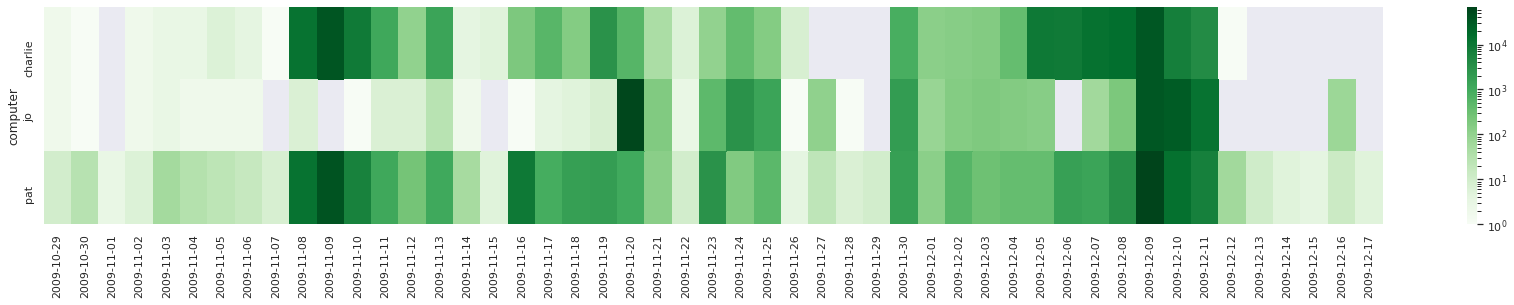

In [ ]:
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize

sns.set(rc = {'figure.figsize':(30,4)})
sns.heatmap(df_m57bydaycomp, cmap="Greens",norm=LogNorm())

In [ ]:
# 4a) Can you find out what happened on the busy days?